<a href="https://colab.research.google.com/github/hamdansyaif/handson-ml2/blob/main/midterm-ml/clustering/midterm_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/midterm_Clustering/clusteringmidterm.csv')
display(df.head())

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


=== 1. INFO DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-nu

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000



=== 4. CEK DUPLIKAT ===
Jumlah baris duplikat: 0
Jumlah CUST_ID unik: 8950 dari 8950 baris


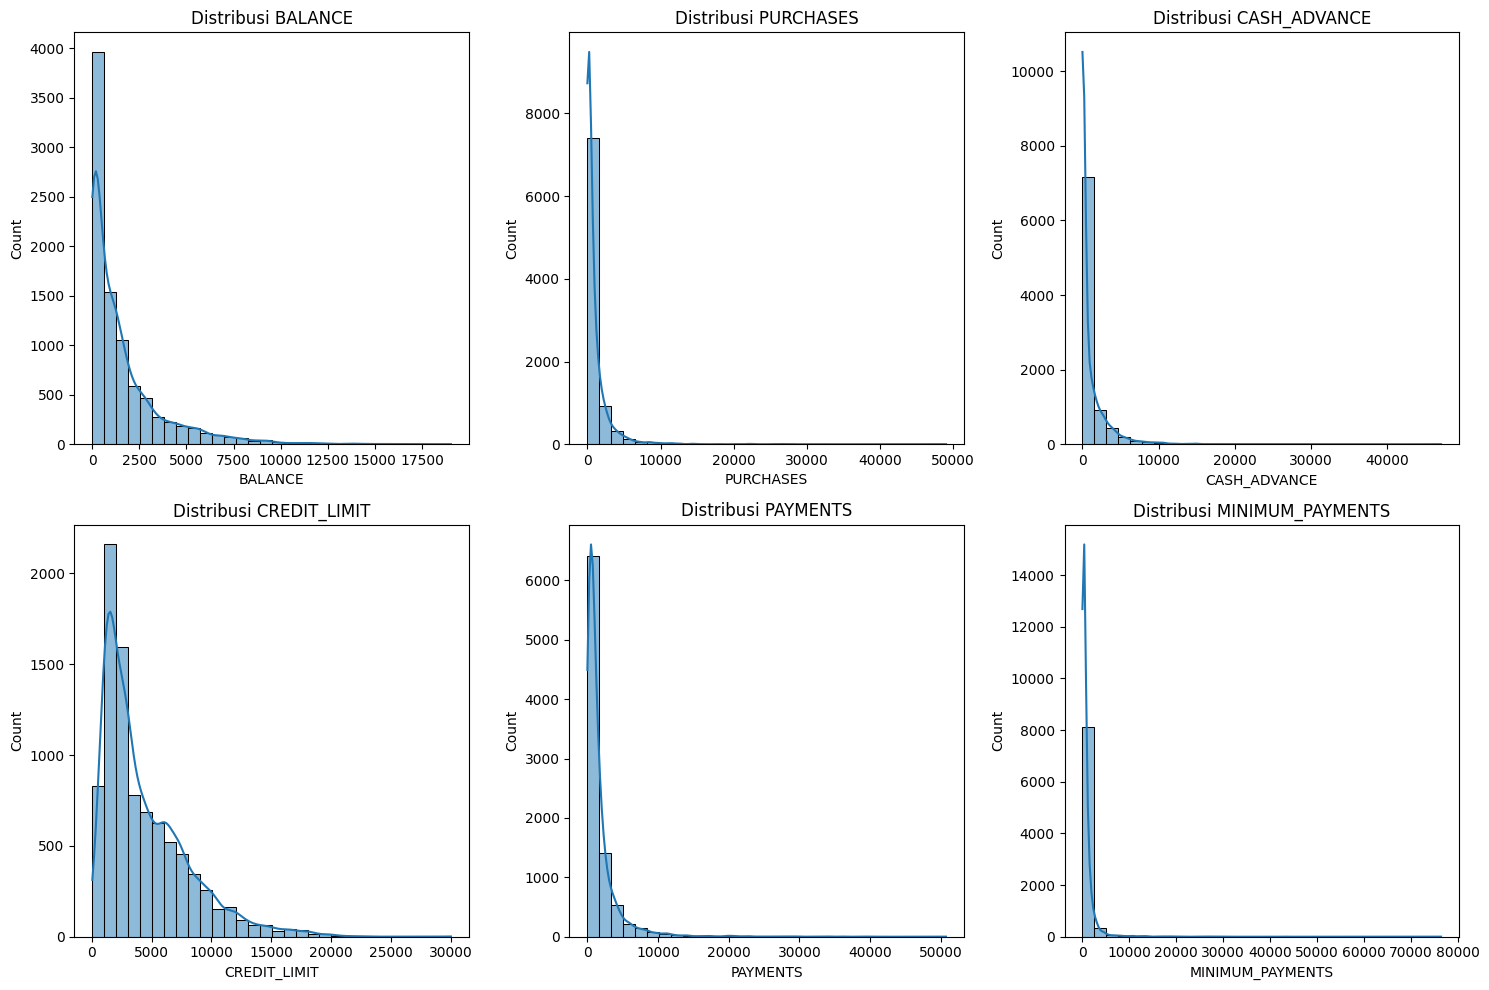

In [2]:
# --- CODE BLOCK 1: Data Audit & Diagnostic ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data Mentah
df = pd.read_csv('/content/drive/MyDrive/midterm_Clustering/clusteringmidterm.csv')

print("=== 1. INFO DATASET ===")
print(df.info())

print("\n=== 2. CEK MISSING VALUES ===")
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])

print("\n=== 3. CEK STATISTIK DESKRIPTIF (Perhatikan Mean vs Max) ===")
# Ini untuk melihat outliers. Kalau Mean rendah tapi Max tinggi banget, berarti ada outlier.
display(df.describe())

print("\n=== 4. CEK DUPLIKAT ===")
print(f"Jumlah baris duplikat: {df.duplicated().sum()}")
print(f"Jumlah CUST_ID unik: {df['CUST_ID'].nunique()} dari {len(df)} baris")

# Visualisasi Distribusi (PENTING untuk cek Skewness)
# Data keuangan biasanya "miring" ke kiri (banyak yang kecil, sedikit yang raksasa)
cols_to_plot = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_plot):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

In [3]:
# --- CODE BLOCK 2: Advanced Preprocessing & Saving ---

from sklearn.preprocessing import StandardScaler
import numpy as np

print("Sedang memproses data...")

# 1. HANDLING MISSING VALUES
# Kita isi dengan Median karena distribusi datanya skewed (miring)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)

print(f"Sisa Missing Values: {df.isnull().sum().sum()} (Harusnya 0)")

# 2. DROP KOLOM TIDAK PENTING
# CUST_ID cuma label, tidak ada hubungannya dengan pola belanja. Buang.
if 'CUST_ID' in df.columns:
    df.drop('CUST_ID', axis=1, inplace=True)
    print("Kolom CUST_ID berhasil dibuang.")

# 3. HANDLING SKEWNESS (LOG TRANSFORMATION)
# Algoritma Clustering benci data yang range-nya kejauhan (misal 0 s.d 50.000).
# Kita gunakan log(x + 1) untuk merapatkan jarak data.
# Note: Kita tidak log 'TENURE' karena dia satuan bulan (6-12) yang sudah sempit.
cols_to_log = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
               'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT',
               'PAYMENTS', 'MINIMUM_PAYMENTS']

# Terapkan logaritma
df[cols_to_log] = np.log1p(df[cols_to_log])
print("Log Transformation selesai applied pada kolom monetary.")

# 4. SCALING (STANDARISASI)
# Mengubah semua data jadi skala yang sama (Mean=0, Std=1)
# Agar fitur 'Gaji' tidak mendominasi fitur 'Frekuensi Belanja' cuma karena angkanya lebih gede.
scaler = StandardScaler()
df_scaled_array = scaler.fit_transform(df)

# Kembalikan ke bentuk DataFrame (karena scaler outputnya array numpy)
df_clean = pd.DataFrame(df_scaled_array, columns=df.columns)

# 5. SIMPAN DATA BERSIH (Checkpoint)
save_path = '/content/drive/MyDrive/midterm_Clustering/clustering_clean.csv'
df_clean.to_csv(save_path, index=False)

print("\n=== PREPROCESSING SELESAI ===")
print("Preview Data Bersih (Sudah di-Log & Scaled):")
display(df_clean.head())
print(f"✅ File bersih tersimpan di: {save_path}")

Sedang memproses data...
Sisa Missing Values: 0 (Harusnya 0)
Kolom CUST_ID berhasil dibuang.
Log Transformation selesai applied pada kolom monetary.


/tmp/ipython-input-873650433.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
/tmp/ipython-input-873650433.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v


=== PREPROCESSING SELESAI ===
Preview Data Bersih (Sudah di-Log & Scaled):


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.205218,-0.249434,-0.113532,-0.987090,0.394480,-0.930733,-0.806490,-0.678661,-0.707313,-0.675349,-0.810069,-0.579510,-1.447163,-0.824484,-0.829841,-0.525551,0.36068
1,0.948918,0.134325,-1.679855,-0.987090,-1.087454,1.528788,-1.221758,-0.678661,-0.916995,0.573963,0.784603,-1.379210,0.926060,1.065033,0.908184,0.234227,0.36068
2,0.824993,0.518084,0.600727,1.062022,-1.087454,-0.930733,1.269843,2.673451,-0.916995,-0.675349,-0.810069,0.487865,1.010229,-0.119300,0.450407,-0.525551,0.36068
3,0.624653,-1.016953,0.827499,1.265778,-1.087454,0.564372,-1.014125,-0.399319,-0.916995,-0.258913,-0.123281,-0.874655,1.010229,-4.161996,-0.144271,-0.525551,0.36068
4,0.271260,0.518084,-0.708481,-0.114307,-1.087454,-0.930733,-1.014125,-0.399319,-0.916995,-0.675349,-0.810069,-0.874655,-1.224909,-0.064979,-0.351833,-0.525551,0.36068


✅ File bersih tersimpan di: /content/drive/MyDrive/midterm_Clustering/clustering_clean.csv


1. Loading Data Clean...
2. Melakukan PCA (Reduksi Dimensi)...
   PCA Selesai. Data 17 kolom dipadatkan jadi 2 kolom utama.
3. Menjalankan Elbow Method (Mencari K Optimal)...
   Mohon tunggu, sedang mencoba K=1 sampai K=15...


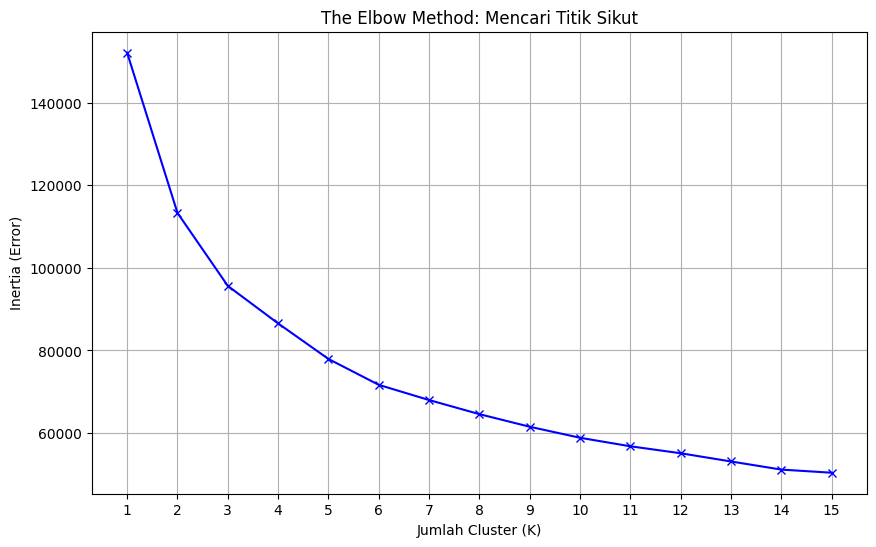


=== ANALISIS ===
Silakan lihat grafik di atas.
Carilah titik di mana garisnya mulai 'patah' atau melandai drastis.
Biasanya untuk data kartu kredit, K yang optimal ada di angka 3, 4, atau 5.


In [4]:
# --- CODE BLOCK 3: PCA & Elbow Method ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Load Data Bersih
print("1. Loading Data Clean...")
df_clean = pd.read_csv('/content/drive/MyDrive/midterm_Clustering/clustering_clean.csv')

# 2. PCA (Untuk Visualisasi Nanti)
print("2. Melakukan PCA (Reduksi Dimensi)...")
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(df_clean)

# Simpan hasil PCA ke DataFrame baru
df_pca = pd.DataFrame(data=pca_2d, columns=['PCA1', 'PCA2'])
print("   PCA Selesai. Data 17 kolom dipadatkan jadi 2 kolom utama.")

# 3. ELBOW METHOD (Mencari Jumlah K Terbaik)
print("3. Menjalankan Elbow Method (Mencari K Optimal)...")
print("   Mohon tunggu, sedang mencoba K=1 sampai K=15...")

inertia = []
range_values = range(1, 16)

for i in range_values:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(df_clean)
    inertia.append(kmeans.inertia_)

# 4. VISUALISASI ELBOW
plt.figure(figsize=(10, 6))
plt.plot(range_values, inertia, 'bx-')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia (Error)')
plt.title('The Elbow Method: Mencari Titik Sikut')
plt.xticks(range_values)
plt.grid(True)
plt.show()

print("\n=== ANALISIS ===")
print("Silakan lihat grafik di atas.")
print("Carilah titik di mana garisnya mulai 'patah' atau melandai drastis.")
print("Biasanya untuk data kartu kredit, K yang optimal ada di angka 3, 4, atau 5.")

=== 4. TRAINING MODEL K-MEANS ===
✅ Model K-Means (K=4) selesai dilatih.
📊 Silhouette Score: 0.2166 (Score > 0.2 untuk data keuangan sudah lumayan)


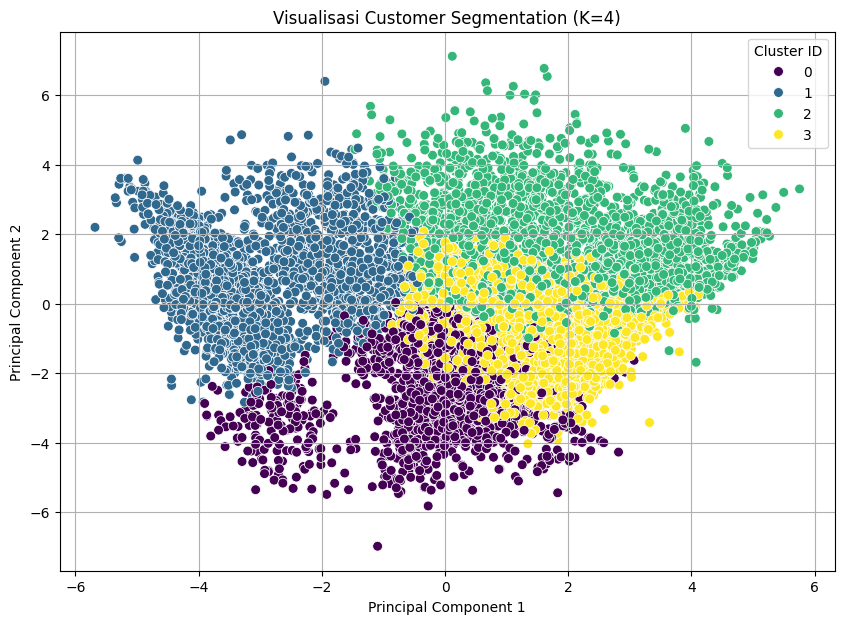


=== DISTRIBUSI NASABAH PER CLUSTER ===
Cluster_Labels
0    1570
1    2760
2    2580
3    2040
Name: count, dtype: int64


In [5]:
# --- CODE BLOCK 4: K-Means Modeling & Visualization ---

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

print("=== 4. TRAINING MODEL K-MEANS ===")

# 1. Train Model dengan K=4 (Sesuai Elbow Method)
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)

# Kita fit ke data bersih (df_clean)
cluster_labels = kmeans.fit_predict(df_clean)

# 2. Hitung Evaluasi (Silhouette Score)
# Score berkisar -1 s.d 1. Semakin dekat ke 1, semakin rapi clusternya.
sil_score = silhouette_score(df_clean, cluster_labels)
print(f"✅ Model K-Means (K={k}) selesai dilatih.")
print(f"📊 Silhouette Score: {sil_score:.4f} (Score > 0.2 untuk data keuangan sudah lumayan)")

# 3. Simpan Label ke Dataframe
# Kita simpan hasil cluster ke data PCA untuk visualisasi
df_pca['Cluster'] = cluster_labels
# Kita simpan juga ke Data Asli (df) untuk interpretasi bisnis nanti
df_final = pd.read_csv('/content/drive/MyDrive/midterm_Clustering/clusteringmidterm.csv')
# (Opsional) Jika baris berkurang karena cleaning, pastikan index cocok.
# Tapi karena kita cuma impute, jumlah baris harusnya sama (8950).
df_final['Cluster_Labels'] = cluster_labels

# 4. VISUALISASI CLUSTER (2D PCA)
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=50)
plt.title(f'Visualisasi Customer Segmentation (K={k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

# 5. CEK JUMLAH NASABAH PER CLUSTER
print("\n=== DISTRIBUSI NASABAH PER CLUSTER ===")
print(df_final['Cluster_Labels'].value_counts().sort_index())

=== 5.A. HIERARCHICAL CLUSTERING ===


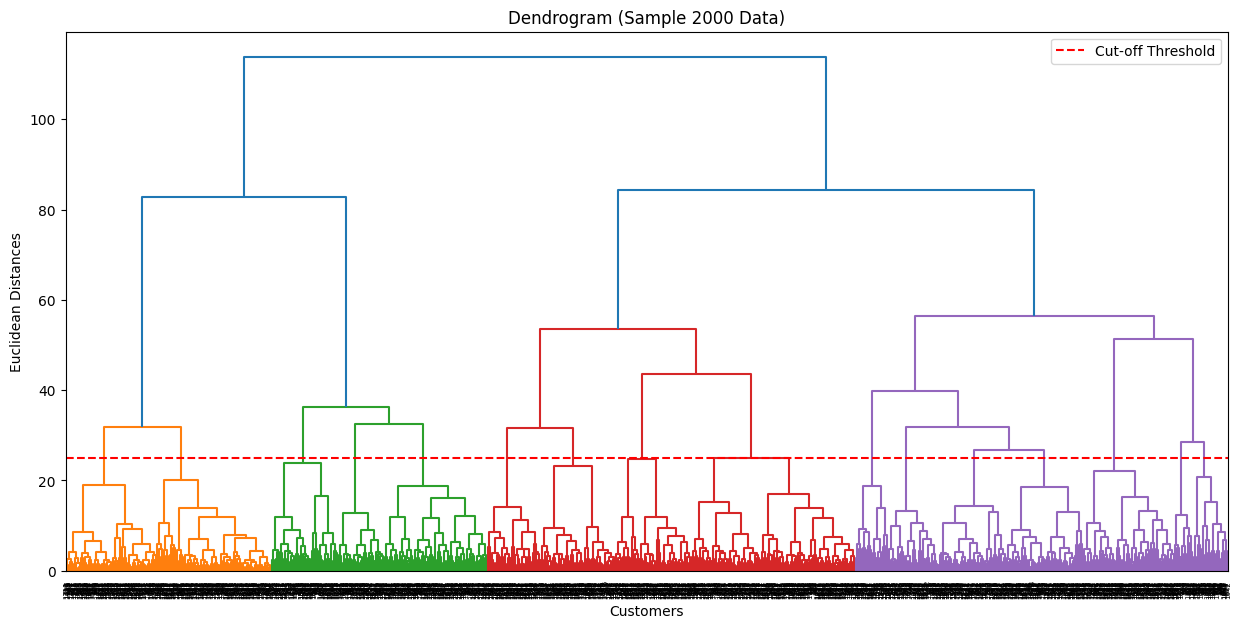

✅ Hierarchical Clustering Selesai.
📊 Silhouette Score (Hierarchical): 0.1658

=== 5.B. DBSCAN (Density-Based Clustering) ===
✅ DBSCAN Selesai.
Jumlah Cluster ditemukan: 5
Jumlah Noise (Outlier): 461 nasabah


In [6]:
# --- CODE BLOCK 5: Hierarchical Clustering & DBSCAN ---

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

print("=== 5.A. HIERARCHICAL CLUSTERING ===")
# 1. Plot Dendrogram (Pohon Keputusan)
# Ini memvisualisasikan bagaimana data bergabung dari banyak menjadi satu.
# Kita ambil sample 2000 data saja biar grafik terbaca & RAM hemat.
plt.figure(figsize=(15, 7))
plt.title("Dendrogram (Sample 2000 Data)")
dendrogram = sch.dendrogram(sch.linkage(df_clean.iloc[:2000], method='ward'))
plt.axhline(y=25, color='r', linestyle='--', label='Cut-off Threshold') # Garis potong imajiner
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.legend()
plt.show()

# 2. Training Agglomerative Clustering
# Kita set K=4 sama seperti K-Means biar adil perbandingannya
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(df_clean)

score_hc = silhouette_score(df_clean, hc_labels)
print(f"✅ Hierarchical Clustering Selesai.")
print(f"📊 Silhouette Score (Hierarchical): {score_hc:.4f}")


print("\n=== 5.B. DBSCAN (Density-Based Clustering) ===")
# DBSCAN bagus untuk mencari 'Noise' (Nasabah aneh).
# eps = Jarak maksimum antar tetangga
# min_samples = Minimal tetangga untuk dianggap cluster
dbscan = DBSCAN(eps=2.0, min_samples=10)
dbscan_labels = dbscan.fit_predict(df_clean)

# Hitung jumlah cluster (Label -1 artinya Noise/Outlier)
n_clusters_db = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_db = list(dbscan_labels).count(-1)

print(f"✅ DBSCAN Selesai.")
print(f"Jumlah Cluster ditemukan: {n_clusters_db}")
print(f"Jumlah Noise (Outlier): {n_noise_db} nasabah")
# Note: DBSCAN seringkali menghasilkan score rendah di data High-Dimensional (Curse of Dimensionality)
# Jadi kalau hasilnya cuma 1 cluster atau isinya noise semua, itu wajar di data keuangan.

=== 6. PROFILING CLUSTER (INTERPRETASI BISNIS) ===

TABEL KARAKTERISTIK CLUSTER (Rata-rata):


,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,Count
Cluster,,,,,,,
0,213.575602,351.391924,113.630403,3561.169851,742.552906,0.162090,1570
1,2460.811226,103.316315,2220.058908,4364.174352,1818.290716,0.030980,2760
2,2243.725833,2604.153267,862.924518,6393.232636,2933.028379,0.170587,2580
3,532.394305,697.612490,112.151413,2986.828456,862.810696,0.291984,2040


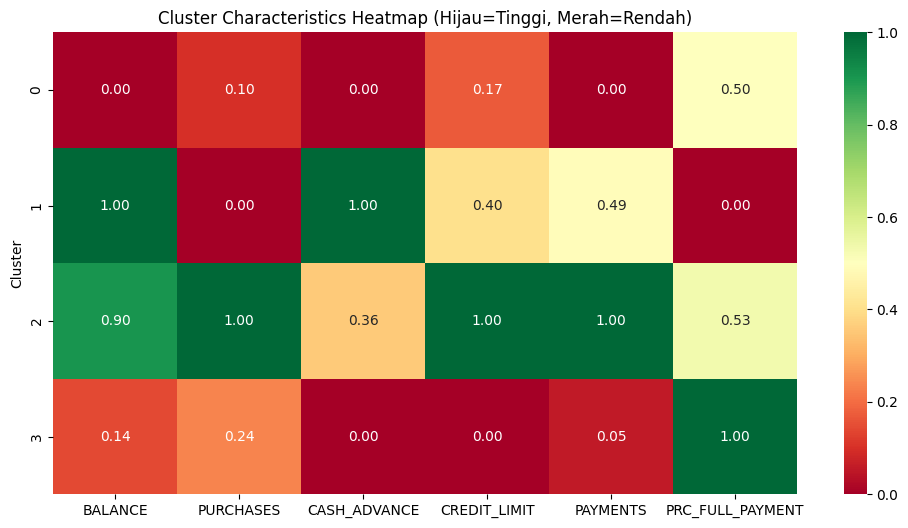

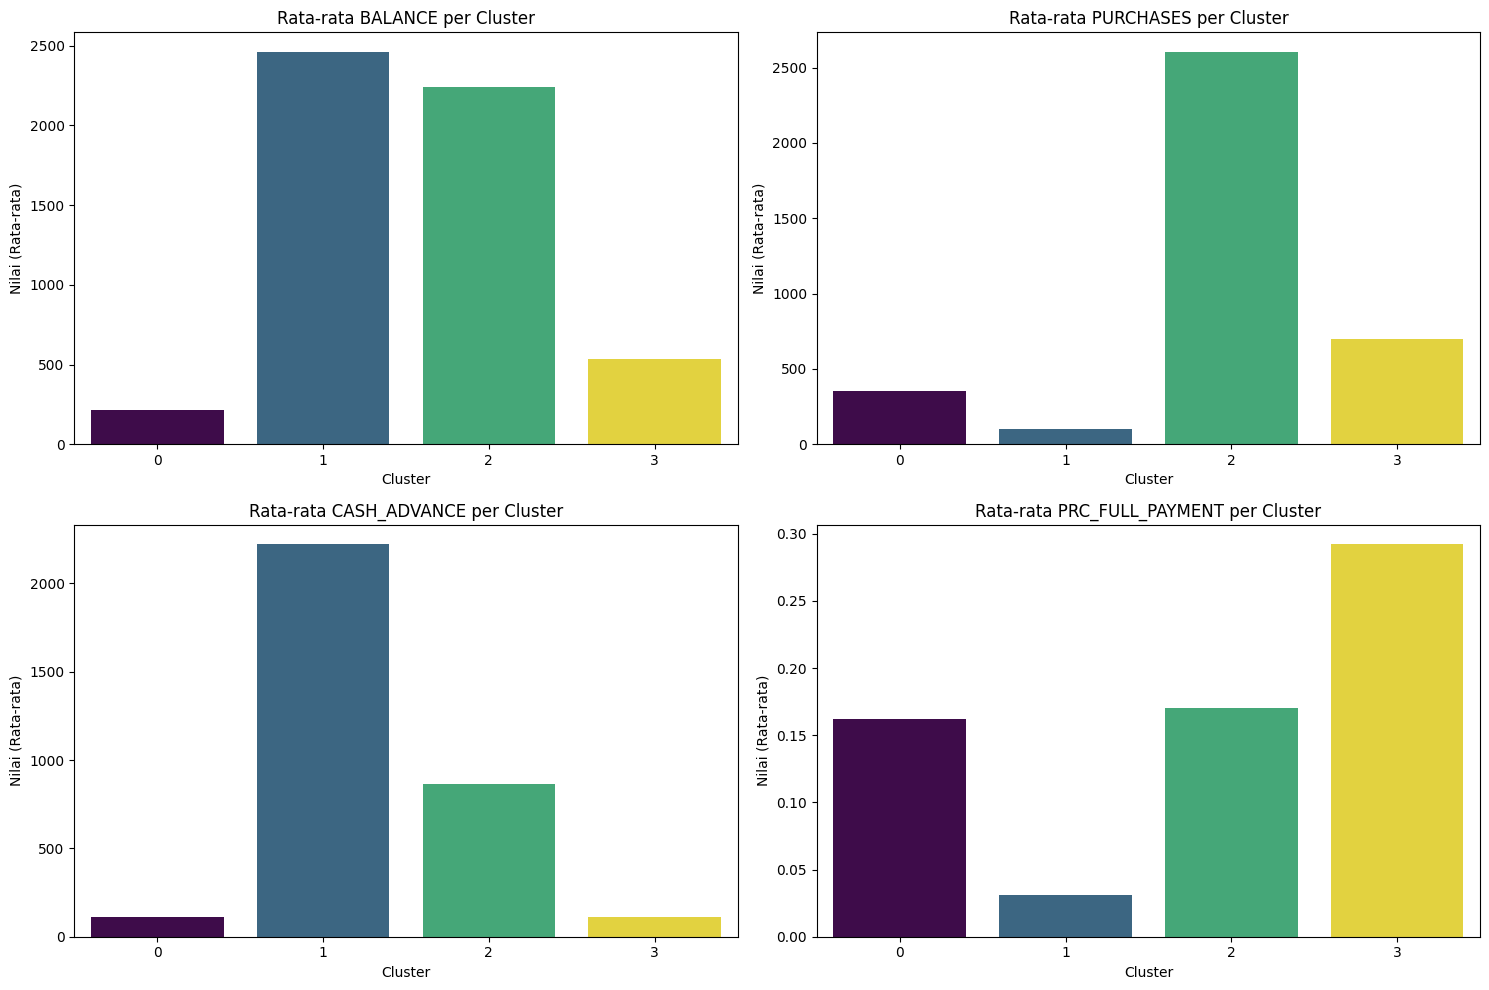


=== PANDUAN INTERPRETASI (Baca Grafik di atas) ===
Tips memberi nama Cluster:
- Cari yang PURCHASES paling tinggi -> 'Big Spender'
- Cari yang BALANCE tinggi tapi PURCHASES/PAYMENT rendah -> 'Revolver' (Tukang Ngutang)
- Cari yang CASH_ADVANCE tinggi -> 'Cash Puller'
- Cari yang BALANCE rendah & PURCHASES rendah -> 'Low Activity'


In [9]:
# --- CODE BLOCK 6 (FIXED): Business Profiling & Interpretation ---

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("=== 6. PROFILING CLUSTER (INTERPRETASI BISNIS) ===")

# 1. Gabungkan Label K-Means ke Data ASLI
df_real = pd.read_csv('/content/drive/MyDrive/midterm_Clustering/clusteringmidterm.csv')

# Handling Missing Values di data asli
df_real['MINIMUM_PAYMENTS'] = df_real['MINIMUM_PAYMENTS'].fillna(df_real['MINIMUM_PAYMENTS'].median())
df_real['CREDIT_LIMIT'] = df_real['CREDIT_LIMIT'].fillna(df_real['CREDIT_LIMIT'].median())

# Masukkan label K-Means
df_real['Cluster'] = cluster_labels

# 2. Hitung Rata-Rata per Cluster (Hanya Kolom Numerik)
# numeric_only=True adalah kuncinya biar kolom CUST_ID gak bikin error
cluster_summary = df_real.groupby('Cluster').mean(numeric_only=True)

# Tambahkan jumlah nasabah per cluster
cluster_summary['Count'] = df_real['Cluster'].value_counts()

print("\nTABEL KARAKTERISTIK CLUSTER (Rata-rata):")
# Kita tampilin kolom-kolom kunci aja biar gak pusing
key_cols = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'PRC_FULL_PAYMENT', 'Count']
display(cluster_summary[key_cols])

# 3. Visualisasi Heatmap
# Normalize data (0-1) biar heatmap-nya valid
summary_scaled = (cluster_summary - cluster_summary.min()) / (cluster_summary.max() - cluster_summary.min())

plt.figure(figsize=(12, 6))
# Plot hanya kolom kunci
sns.heatmap(summary_scaled[key_cols[:-1]], annot=True, cmap='RdYlGn', fmt='.2f')
plt.title('Cluster Characteristics Heatmap (Hijau=Tinggi, Merah=Rendah)')
plt.show()

# 4. Visualisasi Bar Chart
features_to_compare = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PRC_FULL_PAYMENT']

plt.figure(figsize=(15, 10))
for i, col in enumerate(features_to_compare):
    plt.subplot(2, 2, i+1)
    sns.barplot(x=cluster_summary.index, y=cluster_summary[col], hue=cluster_summary.index, palette='viridis', legend=False)
    plt.title(f'Rata-rata {col} per Cluster')
    plt.ylabel('Nilai (Rata-rata)')
plt.tight_layout()
plt.show()

print("\n=== PANDUAN INTERPRETASI (Baca Grafik di atas) ===")
print("Tips memberi nama Cluster:")
print("- Cari yang PURCHASES paling tinggi -> 'Big Spender'")
print("- Cari yang BALANCE tinggi tapi PURCHASES/PAYMENT rendah -> 'Revolver' (Tukang Ngutang)")
print("- Cari yang CASH_ADVANCE tinggi -> 'Cash Puller'")
print("- Cari yang BALANCE rendah & PURCHASES rendah -> 'Low Activity'")